# R Basics: Stats

By **[Olga Pierce](https://twitter.com/olgapierce) (ProPublica)** and **[Ryan Menezes](https://twitter.com/ryanvmenezes) (Los Angeles Times)**

*NICAR Conference 2016 -- Denver, CO*

In this class, we're going to run through a grab bag of concepts grounded in statistical theory that will enable you to get the most out of your data. This will be done in R, and we hope you already have some familiarity with the language, its syntax and (many) quirks.

The lineup:

* Ranking with Z-scores
* Comparing groups with t-tests and ANOVA
* Linear, multivariate and logistic regression
* Risk and odds ratios


This tutorial was written in a Jupyter notebook and tested in R version 3.2.2 , though we don't anticipate different behaviors across other versions of R.

Our point of emphasis throughout this tutorial: **Ask the right questions of your data.** We'll list a few to guide you along the way.

In the interest of time, we'll be running through pre-loaded datasets across these two packages.

In [1]:
## if you cannot load the libraries, uncomment the two lines below and run the install
# install.packages("datasets")
# install.packages("nlme")

library("datasets")
library("nlme")

# Ranking

It's easy enough to sort columns in R. But rankings mean more if you take into account the center of the data.

## Z-scores

**When could I use this?** Creating Z-values gives us a way to convert raw numbers into a "standard score" that tells us how far above or below the mean a value is.

For this example, let's take a look at the ratings of U.S. judges from a 1977 New Haven Register report:

In [2]:
head(USJudgeRatings)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8,8,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8,8.1,8,8,8,8.6,8.6


The judges were ranked on a scale of 1-10 across a variety of factors: Number of contacts of lawyer with judge, judicial integrity, demeanor, diligence, case flow managing, prompt decisions, preparation for trial, familiarity with law, sound oral rulings, sound written rulings, physical ability, worthy of retention.

**A question we can answer:** Which judge had the overall best performance across all categories?

This could be accomplished by summing each row across categories. But a quick printout of the means of each row shows us why that may not be a good idea:

In [3]:
colMeans(USJudgeRatings)

CONT     INTG     DMNR     DILG     CFMG     DECI     PREP     FAMI 
7.437209 8.020930 7.516279 7.693023 7.479070 7.565116 7.467442 7.488372 
    ORAL     WRIT     PHYS     RTEN 
7.293023 7.383721 7.934884 7.602326

These are subtle differences, but important. Integrity, on average, was very high among judges (mean=8.02). Getting a 9 in integrity meant a lot less than a 9 in demeanor (mean=7.51) because integrity ratings skewed high.

Z-scores take into account the **center** and the **spread** of the data. The result is a number that reflects how many standard deviations from the mean each individual observation was.

The formula is: $$\frac{x-\mu}{\sigma}$$ where $x$ is the individual observation, $\mu$ is the mean and $\sigma$ is the standard deviation.

R will handle all of the math with the `scale` function.

In [4]:
judges.scaled <- scale(USJudgeRatings)

In [5]:
head(judges.scaled)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
"AARONSON,L.H.",-1.8463728,-0.1570227,0.1606366,-0.4362573,-0.4407223,-0.2056406,-0.3854136,-0.4092492,-0.1911039,-0.3992382,0.3885971,0.1795455
"ALEXANDER,J.M.",-0.6772505,1.1414345,1.1224227,0.8957473,0.3731269,0.6661597,0.5586058,0.5391307,0.5019355,0.5371568,0.6014593,0.9970057
"ARMENTANO,A.J.",-0.252115155,0.102668710,0.248071691,0.118744596,0.024334361,0.043445197,0.034150574,0.012252971,0.006907369,0.016937378,-0.037127115,0.179545514
"BERDON,R.I.",-0.6772505,1.0115888,0.8601174,1.2287484,0.9544477,1.1643313,1.2928432,1.2767596,1.0959692,1.1614202,0.9207525,0.9970057
"BRACKEN,J.J.",-0.1458313,-2.1047086,-2.8121570,-1.3242604,-1.7196282,-1.7001554,-1.8538883,-1.8845069,-2.1712162,-2.1679844,-2.5914726,-2.5453217
"BURNS,E.B.",-1.3149536,1.0115888,1.0349876,0.8957473,0.4893910,0.5416168,0.6634969,0.5391307,0.6999467,0.6412007,0.7078903,0.9061768


Our new data frame has the z-scores, which correspond to where the raw score would be situated on a normal curve with the mean and standard deviation of that column.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Normal_distribution_and_scales.gif/800px-Normal_distribution_and_scales.gif)

Summing the z-scores for a given judge will tell us how many standard deviations above or below the mean he or she was in the aggregate:

In [6]:
head(sort(rowSums(judges.scaled), decreasing = TRUE))

CALLAHAN,R.J.    RUBINOW,J.E.      NARUK,H.J.       DALY,J.J.    SHEA,J.F.JR. 
       16.32169        15.44184        15.42743        11.99556        11.78182 
O'SULLIVAN,T.J. 
       11.60215

Z-values are also valuable tools for ranking proportions, which are sometimes tricky to sort because of varying denominators. At the L.A. Times, we used a z-value to [identify census tracts where crowded housing was a problem](https://github.com/ryanvmenezes/notebooks/blob/master/Z-values.ipynb).

# Basic comparisons of groups

Sometimes simpler statistics are all you need to find a great story.

## T-test for comparison of two means

**When could I use this?** This is useful if two groups have different means (averages), and you want to make sure the difference is statistically significant.

The below example uses data on language scores from students in the Netherlands.

In [7]:
scores <- data.frame(bdf)
head(scores)

,schoolNR,pupilNR,IQ.verb,IQ.perf,sex,Minority,repeatgr,aritPRET,classNR,aritPOST,ellip.h,currmeet,mixedgra,percmino,aritdiff,homework,classsiz,groupsiz,IQ.ver.cen,avg.IQ.ver.cen,grpSiz.cen
1,1,17001,15,12.33333,0,N,0,14,180,24,⋯,1.83333,0,60,12,2.33333,29,29,3.165938,-1.514062,5.899432
2,1,17002,14.5,10,0,Y,0,12,180,19,⋯,1.83333,0,60,12,2.33333,29,29,2.665938,-1.514062,5.899432
3,1,17003,9.5,11,0,N,0,10,180,24,⋯,1.83333,0,60,12,2.33333,29,29,-2.334062,-1.514062,5.899432
4,1,17004,11,10,0,N,0,13,180,26,⋯,1.83333,0,60,12,2.33333,29,29,-0.8340621,-1.514062,5.899432
5,1,17005,8,6.66667,0,N,0,8,180,9,⋯,1.83333,0,60,12,2.33333,29,29,-3.834062,-1.514062,5.899432
6,1,17006,9.5,9,0,Y,0,8,180,13,⋯,1.83333,0,60,12,2.33333,29,29,-2.334062,-1.514062,5.899432


**A question we can answer:** Does being in a large class have an impact on the students' language test scores? 

First, let's create a binary variable indicating if a class is large or not.

In [8]:
bigclass <- ifelse(scores$classsiz>=25, 1, 0) # marking a "large" class if it has 25+ students
scores <- cbind(scores, bigclass) # adding the column back to the data frame
head(scores[,c("langPOST", "bigclass")])

,langPOST,bigclass
1,46,1
2,45,1
3,33,1
4,46,1
5,20,1
6,30,1


Now that we have one binary variable (this gives us two categories to compare), and one continuous variable (language scores) we can compare means. First, let's just look to see if the means are different.

In [9]:
tapply(scores$langPOST, scores$bigclass, mean)

0        1 
41.11538 40.84605

So, preliminarily, it looks like we have an expected result. Children in smaller classes (bigclass=0) have higher test scores than children in larger classes. But is that result statistically significant? For that we will want to run a t-test. Note that this test defaults to a 95% confidence interval, which is standard. It also defaults to a Welch t-test, which is a good thing because it does not require that the two groups have the same variance.

This line of code uses the `response_variable ~ predictor_variable` notation that will be repeated throughout.

In [10]:
t.test(langPOST ~ bigclass, data=scores)


	Welch Two Sample t-test

data:  langPOST by bigclass
t = 0.68551, df = 1576, p-value = 0.4931
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5013166  1.0399788
sample estimates:
mean in group 0 mean in group 1 
       41.11538        40.84605 


#### How to interpret this result

In order to conclude that the means for the two groups are significantly different at 95% confidence, you need a p-value less than .05. In this case, the difference in means is nowhere near significant.

Let's see what a significant result looks like. This time comparing the sex variable with test score.

In [11]:
t.test(langPOST ~ sex, data=scores)


	Welch Two Sample t-test

data:  langPOST by sex
t = -7.1355, df = 2283.3, p-value = 1.289e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.382810 -1.924295
sample estimates:
mean in group 0 mean in group 1 
       39.66667        42.32022 


## ANOVA (Analysis of Variance) for comparison of multiple means

**When could I use this?** If we want to compare the means of multiple groups, we need a special procedure. Simply comparing means pairwise means we will likely not apply a stringent enough standard for significance. Let's use another example from our test result data. 

**A question we can answer:** Do public and different types of private school have significantly different average test scores?

Here's a breakdown of the 'denomina' variable from our table:

1=Public school  
2=Protestant private school  
3=Catholic private school  
4=non-denominational private school

 So, for clarity's sake, let's recode the variable.

In [12]:
denom <- factor(scores$denomina, labels=(c("public","Protestant","Catholic","non-denom")))

In [13]:
round(tapply(scores$langPOST, denom, mean), digits=2)

public Protestant   Catholic  non-denom 
     39.41      42.22      40.62      44.65

Okay - so now we see if the differences are significant.

In [14]:
aov.denom <- aov(langPOST ~ factor(denomina), data=scores)
summary(aov.denom)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
factor(denomina)    3   4467  1489.0    18.8 4.82e-12 ***
Residuals        2283 180850    79.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Here we are conducting an F-test, instead of a t-test. The key value here is the `Pr(>F)` value, which we can see is very small. R also helps you out by giving you a key for significance level. Because we have three asterisks, that means our result is significant at the 99.9% confidence level.

But what this tells us is just that _one_ of the means is different than the others. It doesn't tell us how many or which ones. For that we need to do an additional _post hoc_ test.

In [15]:
pairwise.t.test(scores$langPOST, denom, p.adj="holm")


	Pairwise comparisons using t tests with pooled SD 

data:  scores$langPOST and denom 

           public  Protestant Catholic
Protestant 2.5e-09 -          -       
Catholic   0.0244  0.0022     -       
non-denom  5.1e-07 0.0244     0.0002  

P value adjustment method: holm 

What this shows us is that each of the means are significantly different from each other. Reminder: because we are talking 95% confidence, we want each of the p-values reported in the table to be less than .05.

# Regression

You might have heard the phrase "correlation doesn't equal causation." If you're looking to establish causation, turn to regression, which helps us discern how much particular variables affect a response, and if that predicting power is significant.

There are many different types of regression, but we'll cover two types: ordinary least squares and logistic.

## Ordinary least squares (OLS) regression

**When could I use this?** Use OLS regression if the variable you're trying to predict is a continuous, numerical variable.

If you're trying to regress one predictor variable on a response variable, this is commonly called *simple linear regression*. With multiple predictors, this process is referred to as *multivariate regression*.

We'll start with a simple linear example.

**A question we could answer:** Do states with more high-school graduates have higher life expectancies?

For this example, we'll use the [state.x77](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/state.html) data set, a collection of figures about the 50 U.S. states from the 1970s.

In [16]:
statedata <- data.frame(state.x77)
head(statedata)

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766


While correlation does not prove causation, the absence of correlation likely means there is no causation. Put another way, you should show your variables are at least associated before moving on with a regression. We can quickly plot the relationship between our two variables of interest as a quick diagnostic.

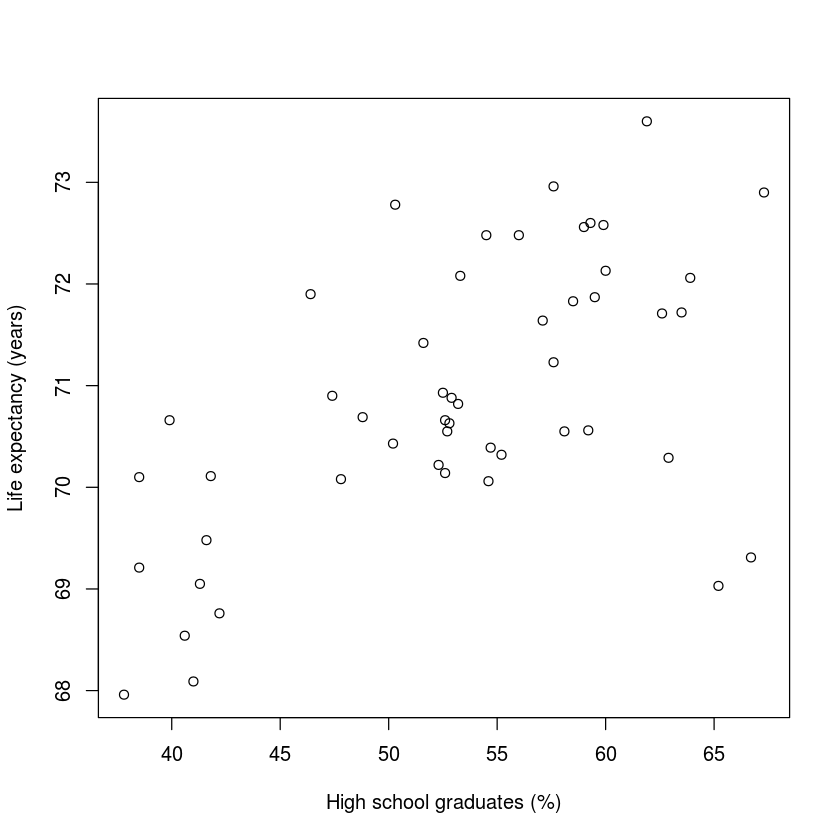

In [17]:
plot(Life.Exp ~ HS.Grad, data = statedata, xlab = "High school graduates (%)", ylab = "Life expectancy (years)")

It appears there is a positive relationship between the percentage of high-school graduates in the state and the life expectacy of that state. So let's move on to modeling the relationship.

R's go-to command for an OLS regression is `lm` for "linear model." It is pretty easy to get R to do all the math.

In [18]:
hs_le_model <- lm(Life.Exp ~ HS.Grad, data = statedata)

To get all the juicy stuff out of all the math that was just crunched behind the scenes, call `summary` on the model we just created.

In [19]:
summary(hs_le_model)


Call:
lm(formula = Life.Exp ~ HS.Grad, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.01867 -0.67517 -0.07538  0.64483  2.17311 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 65.73965    1.04748  62.760  < 2e-16 ***
HS.Grad      0.09676    0.01950   4.961  9.2e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.103 on 48 degrees of freedom
Multiple R-squared:  0.339,	Adjusted R-squared:  0.3252 
F-statistic: 24.61 on 1 and 48 DF,  p-value: 9.196e-06


### Interpreting the output

There is lots to unpack here:

* The formula for the regression line that this model created is in the `Estimate` column. For this example, that formula is $$lifeExpectancy = (0.09676) * hsGraduationRate+65.73965$$


* The `Estimate` for `HS.Grad` is the slope of that line. It tells us that for every one percent increase in high school graduation rate, there is an expected increase in life expectancy of one 0.1 year.


* The `(Intercept)` term (more specifically, the y-intercept) tells us what the value of the response variable would be if the predictor variable was 0. For this model, a state with a high school graduation rate of 0% would be expected to have a life expectancy of 65.7 years.


* `Std. Error` is the error associated with estimating each term.


* `t value` is the `Estimate` divided by the `Std. Error`. It is where the estimate falls on the [t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution), which will help us decide if something other than randomness could account for this result.


* `Pr(>|t|)` is the p-value associated with that t. It is the probability that we are seeing this result or a more extreme one, given that we assume there is no relationship between the estimate and the predictor. A rough guideline says that p-values less than .05 are statistically significant at a 95% confidence level, though this should never be the endpoint of any analysis. `Signif. codes` is a legend for R's conventions.

**What makes for a "good" model?** It depends on your purpose and takes a lot of work past this printout in R to find out. Regression models are done under numerous assumptions; you should check if these are true of your data. On the NICAR-L listserv, folks have circulated many [helpful](https://www.aasv.org/shap/issues/v15n5/v15n5editor.htm) [resources](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/) that should guide a diagnosis of a model. If you're attempting to use a model to make predictions, you may need to turn to a process like [cross-validation](https://www.cs.cmu.edu/~schneide/tut5/node42.html).

In this specific case, it does not appear we have a great model. One quick indicator is the `Multiple R-squared`, which in the case of a linear regression is the square of the correlation coefficient.  The closer to 1 an R-squared is, the better the model (but beware of [overfitting](http://blog.minitab.com/blog/adventures-in-statistics/the-danger-of-overfitting-regression-models)).

### Extending to multiple predictor variables

**Another question we can answer:** There were a few other variables in the data set. What else is affecting a state's life expectancy?

Let's add a few more variables to our model: murder rate (per 100,000 population) and illiteracy rate.

In [20]:
multi_model <- lm(Life.Exp ~ HS.Grad + Murder + Illiteracy, data = statedata)

In [21]:
summary(multi_model)


Call:
lm(formula = Life.Exp ~ HS.Grad + Murder + Illiteracy, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65922 -0.46400  0.08517  0.59643  1.77657 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 69.73545    1.22208  57.063  < 2e-16 ***
HS.Grad      0.05179    0.01876   2.761  0.00825 ** 
Murder      -0.25813    0.04350  -5.934 3.63e-07 ***
Illiteracy   0.25398    0.30508   0.833  0.40942    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7985 on 46 degrees of freedom
Multiple R-squared:  0.6679,	Adjusted R-squared:  0.6462 
F-statistic: 30.83 on 3 and 46 DF,  p-value: 4.444e-11


The same principles detailed above apply to the interpretation of this model.

It appears that our R-squared increased to 0.6679, so we're on the way to building a better model to predict life expectancy.

But this model incorporates one predictor we can deem statistically insignificant: illiteracy rate. The quick way to make that out is the lack of any asterisks next to that line in the table. Some practices call for throwing out insignificant variables from model If we did that here, the R-squared of the reduced model would be 0.6628, meaning we are gaining little predictive power from knowing what the illiteracy rate is in a state.

High school graduation rate was significant at a 99% confidence level (a positive relationship) and the murder rate was significant at a 99.9% level (a negative relationship, which is what we might expect).

### Residuals

Our latest model gives us an expectation for life expectancy, given the rates of high school graduation, murder and illiteracy. If we wanted to know which states outperformed or underperformed relative to the expectation, we can quickly take a look at the *residuals*.

A residual is simply the distance of the actual value from the value the model predicts. This would be relatively easy to calculate by hand: multiply each state's three predictors by their respective estimates from the model, sum that, then add the intercept to get a predicted value. Then, subtract the predicted value from the actual value for the residual.

Luckily, R can do this with the built-in functions `predict` and `residuals`. We'll use those two to add columns to our data frame and see which states most outperformed expectations:

In [22]:
statedata$Life.Exp_predicted <- predict(multi_model)
statedata$residual <- residuals(multi_model)
head(
    statedata[
        order(statedata$residual, decreasing = TRUE),
        c('HS.Grad','Murder','Illiteracy','Life.Exp','Life.Exp_predicted','residual')
    ]
)

,HS.Grad,Murder,Illiteracy,Life.Exp,Life.Exp_predicted,residual
Hawaii,61.9,6.2,1.9,73.6,71.82343,1.776571
Texas,47.4,12.2,2.2,70.9,69.59987,1.300134
California,62.6,10.3,1.1,71.71,70.59815,1.111845
Arkansas,39.9,10.1,1.9,70.66,69.67732,0.9826796
Michigan,52.8,11.1,0.9,70.63,69.8333,0.7966952
Kansas,59.9,4.5,0.6,72.58,71.8285,0.7515031


## Logistic regression

**When could I use this?** Sometimes, the variable you're trying to predict isn't a number. Use logistic regression when you're trying to figure out if variables help predict a *categorical* outcome.

**A question we could answer:** When the RMS Titanic sank, did the ["women and children first"](https://en.wikipedia.org/wiki/Women_and_children_first) policy have an effect on the survival rates of passengers?

For this example, we'll use the [Titanic](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/Titanic.html) data set.

It breaks the passengers of the Titanic down like so:
* Class: 1st, 2nd, 3rd, Crew
* Sex: Male, Female
* Age: Child, Adult
* Survived: No, Yes

For each of the 32 combinations of the above categories, there is a row that lists the number of people meeting that classification. Here's what it looks like in a data frame:

In [23]:
# save the R data into a new variable
titanic <- data.frame(Titanic)
head(titanic[order(titanic$Freq, decreasing = TRUE),])

,Class,Sex,Age,Survived,Freq
12,Crew,Male,Adult,No,670
11,3rd,Male,Adult,No,387
28,Crew,Male,Adult,Yes,192
10,2nd,Male,Adult,No,154
29,1st,Female,Adult,Yes,140
9,1st,Male,Adult,No,118


If this is confusing to read: The first line tells us that 670 male, adult crew members didn't survive the sinking.

These data take a few steps to transform into a tidy format.

In [24]:
# drop all the rows with a frequency of 0
titanic <- titanic[titanic$Freq != 0,]
# replicate each line as many times as the "Freq" column calls for
# also, drop the "Freq" column
titanic_long <- titanic[,c(1,2,3,4)][rep(seq_len(dim(titanic)[1]), titanic$Freq),]
# confirm that we now have a row for every passenger, which matches the sum of "Freq"
print(c(nrow(titanic_long), sum(titanic$Freq)))

[1] 2201 2201


Now, `titanic_long` contains a long, tidy data set, with one row for each of the 2,201 passengers.

In [25]:
head(titanic_long)

,Class,Sex,Age,Survived
3,3rd,Male,Child,No
3.1,3rd,Male,Child,No
3.2,3rd,Male,Child,No
3.3,3rd,Male,Child,No
3.4,3rd,Male,Child,No
3.5,3rd,Male,Child,No


The structure shows all of our variables are already set as factors (this will be important in a second).

In [26]:
str(titanic_long)

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "Male","Female": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age     : Factor w/ 2 levels "Child","Adult": 1 1 1 1 1 1 1 1 1 1 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


To run a logistic regression, we need the `glm` command to create a "generalized linear model."

In [27]:
titanic_model <- glm(
    Survived ~ Class + Sex + Age,
    data = titanic_long,
    family = 'binomial'
)

In [28]:
summary(titanic_model)


Call:
glm(formula = Survived ~ Class + Sex + Age, family = "binomial", 
    data = titanic_long)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0812  -0.7149  -0.6656   0.6858   2.1278  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.6853     0.2730   2.510   0.0121 *  
Class2nd     -1.0181     0.1960  -5.194 2.05e-07 ***
Class3rd     -1.7778     0.1716 -10.362  < 2e-16 ***
ClassCrew    -0.8577     0.1573  -5.451 5.00e-08 ***
SexFemale     2.4201     0.1404  17.236  < 2e-16 ***
AgeAdult     -1.0615     0.2440  -4.350 1.36e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.5  on 2200  degrees of freedom
Residual deviance: 2210.1  on 2195  degrees of freedom
AIC: 2222.1

Number of Fisher Scoring iterations: 4


**A note on factors:** Our predictor columns and the response variables were set as [factors](http://www.ats.ucla.edu/stat/r/modules/factor_variables.htm) before we ran this regression. However, if they were character vectors, before the regression they would be treated as factors, and each column's levels would be set in alphabetical order.

### Interpreting the output

* In any regression output, categorical variables are compared against a baseline group. If the variables were characters, the baseline level would be the first alphabetically. With factors, predictors are compared against the first level.
* In a logistic regression, the estimate spit out by R is the "log-odds" of that group compared to the baseline group. To get the odds ratio, you must exponentiate the log-odds. (More in a second on odds and the confusion that arises when trying to explain them.)
* We can read that the women more likely to survive the sinking than men and adults were less likely to survive than children, simply because of the sign of the estimate and the asterisks indicating statistical significance. These data to appear to back up the assertion that women and children were evacuated first. 
* Also, the data show that passengers in the more affluent First Class deck of the ship survived at greater rates. This can be surmised because each of those three class estimates are negative (and significant) with respect to the baseline group, which in this case is First Class. This follows logically, as the First Class decks were closer to the top of the ship.

### Converting odds ratios to risk ratios

Reporting relative odds instead of relative risk can be problematic for a few reasons:
- Odds are hard to explain.
- Readers often think that a ratio of odds expresses relative probabilities, which is not the case.
- Odds ratios are sensitive to the numerator of the denominator of the ratio. In other words, the more common the event you are modeling is in the control group, the more the odds ratio will overstate the relative probabilities of something occurring. Generally speaking, odds ratios should only be used as an approximation of relative probability (something was X times more likely) if the event you are modeling occurs less than 10% of the time in the control group (the denominator of your odds ratio.)
- An example of this is below, from a study of the effect of active intervention on the rate of patients quitting smoking. The odds ratio can overstate the relative risk by as much as a factor of 3 here.

![alt text](http://www.treatobacco.net/en/uploads/image/Fig_%201%20Odds%20ratio.jpg)

Let's revisit the Titanic example and walk through how to represent the difference between the adult and children groups.

In [29]:
table(titanic_long$Age, titanic_long$Survived)

       
          No  Yes
  Child   52   57
  Adult 1438  654

The logistic regression told us that the relative odds of an adult surviving the wreck were $e^{-1.0615}=0.346$ compared to the child group. But, as mentioned above, this can be a little cumbersom to explain.

From the table, we can calculate the **relative risk** of a child surviving the Titanic wreck compared to adults.

The process is fairly simple: We first calculate the probability that a child survived, then compare that to a the probability that an adult survived.

In [30]:
child_risk <- 57 / (57 + 52)
child_risk

[1] 0.5229358

In [31]:
adult_risk <- 654 / (654 + 1438)
adult_risk

[1] 0.3126195

The risk ratio, then, is the ratio of those two figures.

In [32]:
child_risk / adult_risk

[1] 1.672755

This tells us that children on the Titanic had a 67% greater chance of surviving the wreck that sunk the Titanic.